In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [91]:
df=pd.read_csv(r"D:\data science\partice_projects\machin learning projects\linear regression\height-weight\SOCR-HeightWeight.csv")

In [92]:
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [93]:
df=df.drop(columns='Index')

In [94]:
df.head()

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


In [95]:
df.tail()

,Height(Inches),Weight(Pounds)
24995,69.50215,118.0312
24996,64.54826,120.1932
24997,64.69855,118.2655
24998,67.52918,132.2682
24999,68.87761,124.8742


In [96]:
df.describe()

,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000
mean,67.993114,127.079421
std,1.901679,11.660898
min,60.278360,78.014760
25%,66.704397,119.308675
50%,67.995700,127.157750
75%,69.272958,134.892850
max,75.152800,170.924000


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Height(Inches)  25000 non-null  float64
 1   Weight(Pounds)  25000 non-null  float64
dtypes: float64(2)
memory usage: 390.8 KB


In [98]:
df.isnull().sum().sum()

0

In [99]:
df.duplicated().sum()

0

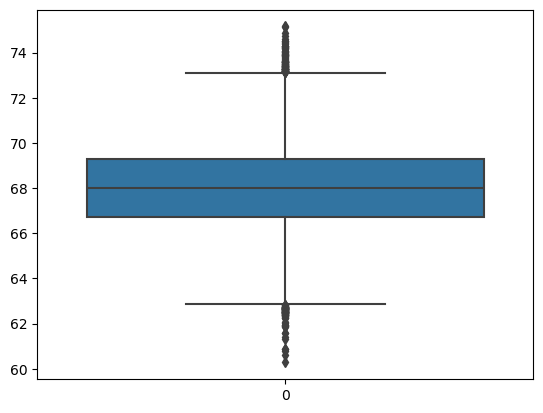

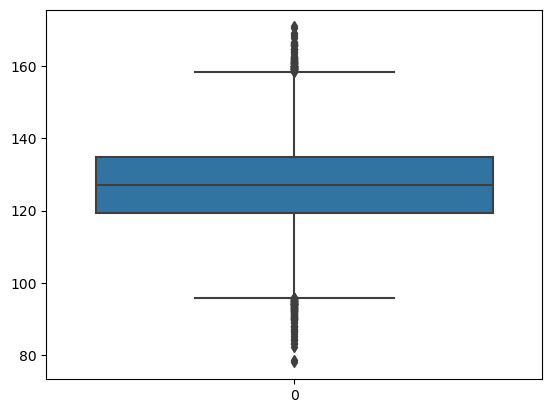

In [100]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

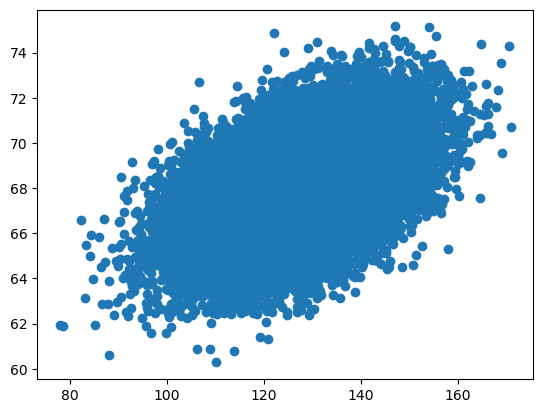

In [101]:
plt.scatter(df['Weight(Pounds)'],df['Height(Inches)'])
plt.show()

In [102]:
df.rename(columns={'Height(Inches)': 'Height','Weight(Pounds)':'Weight'}, inplace=True)


In [103]:
x=df[['Height']]
y=df['Weight']

In [104]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [105]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((16750, 1), (8250, 1), (16750,), (8250,))

In [106]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [107]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [108]:
x_train

array([[ 0.18240014],
       [ 0.7814612 ],
       [ 0.0483681 ],
       ...,
       [ 0.20733095],
       [ 0.68341866],
       [-0.45936782]])

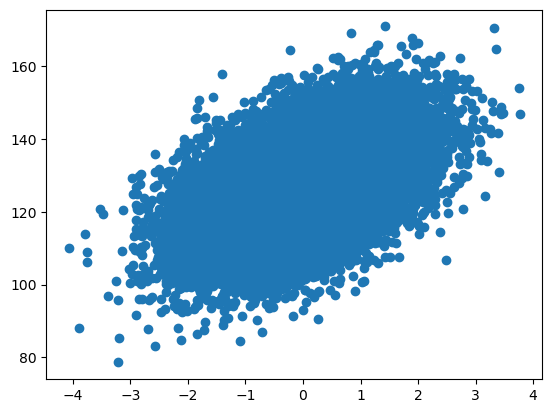

In [109]:
plt.scatter(x_train,y_train)

## lets train the model

In [110]:
from sklearn.linear_model import LinearRegression

In [111]:
lr=LinearRegression()

In [112]:
lr.fit(x_train,y_train)

LinearRegression()

In [113]:
print('The slope is',lr.coef_)
print('The intercept=',lr.intercept_)

The slope is [5.83361125]
The intercept= 127.05361740000002


In [114]:
y_pred=lr.predict(x_test)

In [115]:
from sklearn.metrics import accuracy_score,r2_score

In [116]:
score=r2_score(y_test,y_pred)*100
score

25.42748848575639

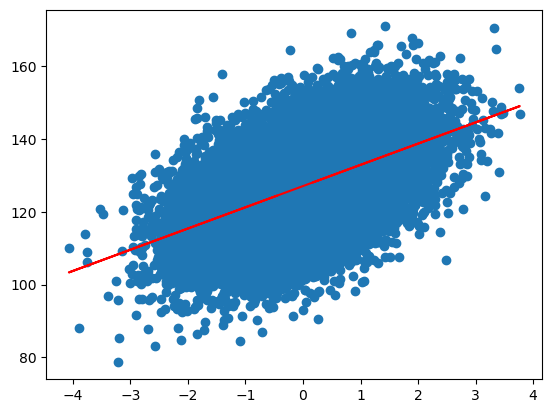

In [124]:
plt.scatter(x_train,y_train)
plt.plot(x_train,lr.predict(x_train),'r')

In [118]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse=mean_squared_error(y_pred,y_test)
mae=mean_absolute_error(y_pred, y_test)
rmse=np.sqrt(mse)
print(mae)
print(mse)
print(rmse)

8.084081158966558
102.89402054296072
10.143668988238955


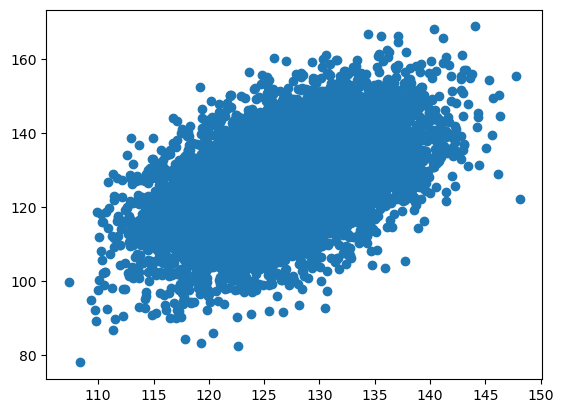

In [119]:
plt.scatter(y_pred,y_test)

6868      5.927117
24016   -14.769483
9668      9.980690
13640    -3.786982
14018   -29.978683
           ...    
10802    -1.692876
7160     -8.678920
2499     12.836403
12899     3.622194
18149   -15.707997
Name: Weight, Length: 8250, dtype: float64


D:\data science\Python installation\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


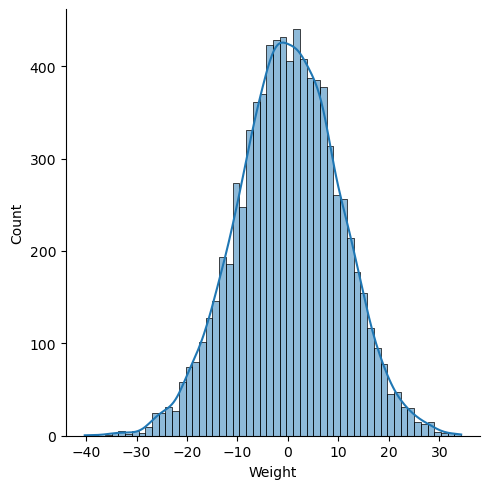

In [122]:
residual=y_test-y_pred
print(residual)
sns.displot(residual,kde=True)


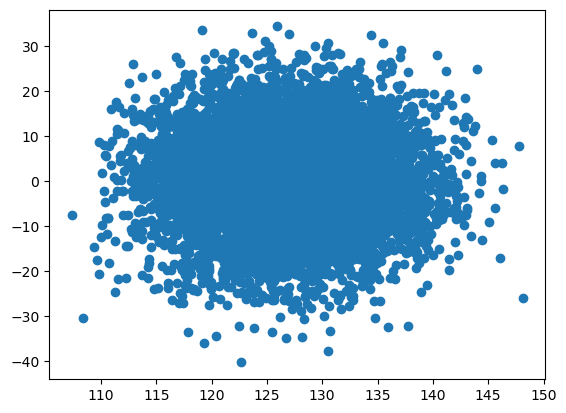

In [123]:
plt.scatter(y_pred,residual)